Número inicial de linhas: 16598

Valores ausentes antes do tratamento:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Número de linhas após remover ausentes: 16291

Arquivo 'vgsales_limpo.csv' salvo com sucesso.


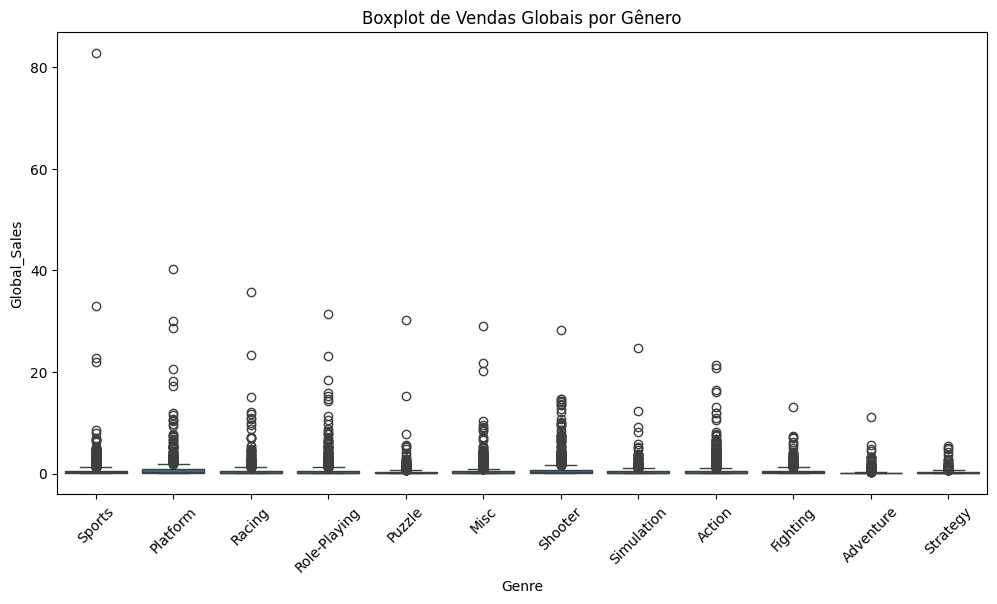

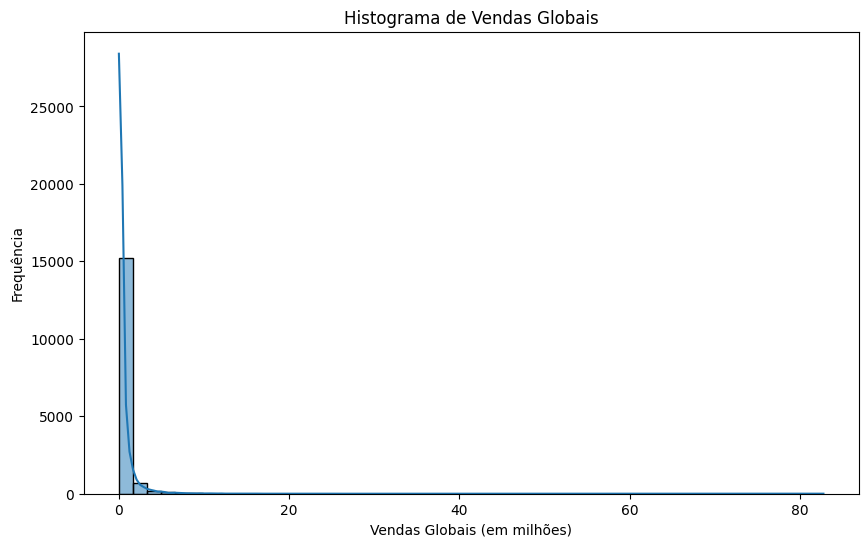

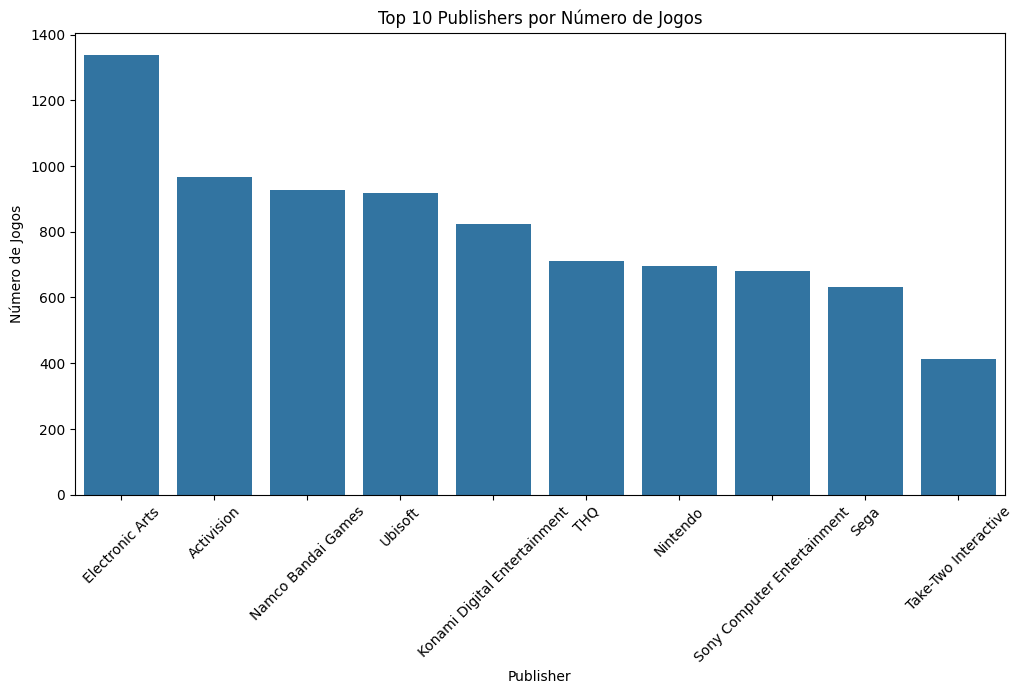

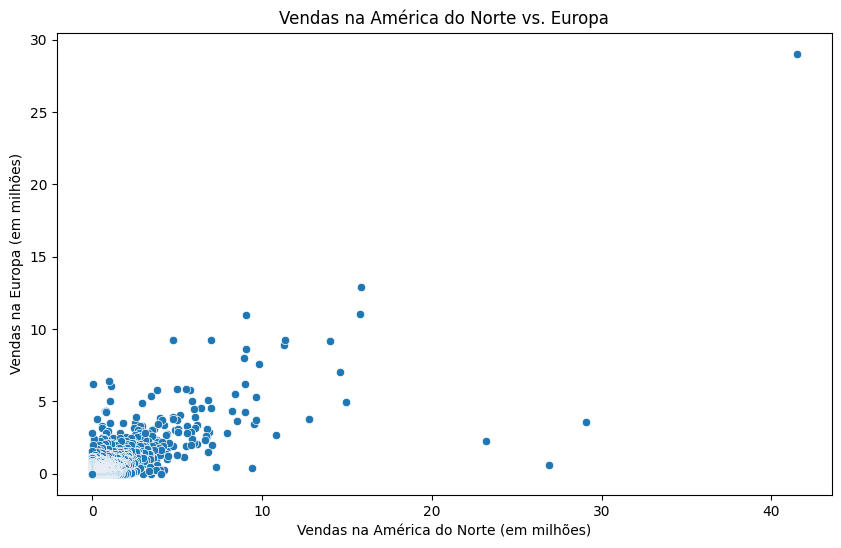


Estatísticas Descritivas para Vendas Globais:
count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64
Moda: [0.02]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregamento dos Dados
df = pd.read_csv('vgsales.csv')
print(f"Número inicial de linhas: {len(df)}")

# 2. Tratamento de Dados Ausentes
# Exibindo a contagem de valores ausentes antes do tratamento
print("\nValores ausentes antes do tratamento:")
print(df.isnull().sum())

# Removendo linhas com dados ausentes em 'Year' e 'Publisher'
# Justificativa: A quantidade de dados ausentes é pequena em relação ao
# total do dataset, então a remoção não causará grande impacto na análise.
df.dropna(subset=['Year', 'Publisher'], inplace=True)
print(f"\nNúmero de linhas após remover ausentes: {len(df)}")

# 3. Limpeza e Transformação de Dados
# Convertendo a coluna 'Year' para o tipo inteiro
df['Year'] = df['Year'].astype(int)

# 4. Exportação do DataFrame Limpo
df.to_csv('vgsales_limpo.csv', index=False)
print("\nArquivo 'vgsales_limpo.csv' salvo com sucesso.")

# 5. Análise Estatística e Visualização

# Boxplot de Vendas Globais por Gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Boxplot de Vendas Globais por Gênero')
plt.xticks(rotation=45)
plt.show()

# Histograma da Distribuição das Vendas Globais
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Histograma de Vendas Globais')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Frequência')
plt.show()

# Gráfico de Barras dos 10 Principais Publishers por Número de Jogos
top_publishers = df['Publisher'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers por Número de Jogos')
plt.xlabel('Publisher')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Dispersão de NA_Sales vs. EU_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df)
plt.title('Vendas na América do Norte vs. Europa')
plt.xlabel('Vendas na América do Norte (em milhões)')
plt.ylabel('Vendas na Europa (em milhões)')
plt.show()

# Estatísticas Descritivas para Vendas Globais
print("\nEstatísticas Descritivas para Vendas Globais:")
print(df['Global_Sales'].describe())
print(f"Moda: {df['Global_Sales'].mode().values}")